In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [57]:
df=pd.read_csv(r"/content/drive/MyDrive/Downloads/3.1-data-sheet-guvi-courses.csv")
df.head(5)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [58]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [60]:
print(df.isnull().sum().sum())
print((47/len(df))*100)      #only 1% of data is missing therefore dropping null values

47
1.2771739130434783


In [61]:
df.dropna(inplace=True)
df.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [62]:
df["published_year"]=df["published_timestamp"].apply(lambda x:np.int(x[0:4]))                   #extracted year
df["published_month"]=df["published_timestamp"].apply(lambda x:np.int(x[5:7]))                  #extracted month

<ipython-input-62-587c891c3c01>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["published_year"]=df["published_timestamp"].apply(lambda x:np.int(x[0:4]))                   #extracted year
<ipython-input-62-587c891c3c01>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

In [63]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,published_year,published_month
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610868,4.096137,2015.430903,6.162949
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334287,6.054948,1.184876,3.379949
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000,2015.000000,3.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000,2016.000000,6.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000,2016.000000,9.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000,2017.000000,12.000000


<Axes: >

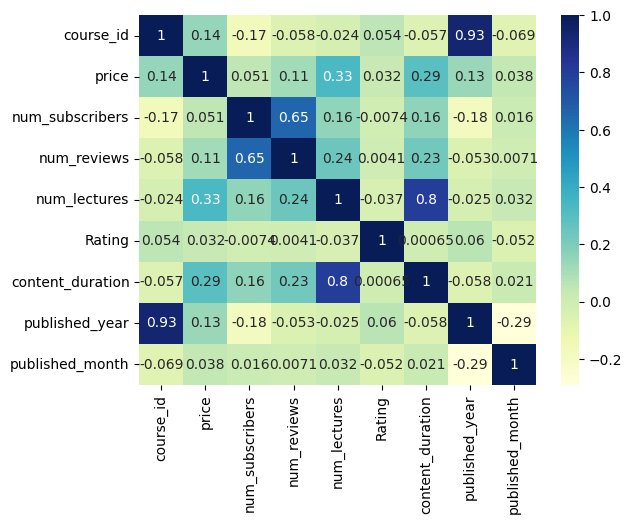

In [64]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

**observations**

Highly co-related feature with Target Variable:

* No features is corelated very highly with Target variable 'Rating'.
* still the highly correlated feature is course_id (0.05),no_of_lectures (0.04),price(-0.032),published_year(0.06) and published_month(-0.05)

Highly co-related pair of features:

* content_duration and num_lectures
* published_year and course_id


array([[<Axes: title={'center': 'course_id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'num_subscribers'}>],
       [<Axes: title={'center': 'num_reviews'}>,
        <Axes: title={'center': 'num_lectures'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'content_duration'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'published_month'}>]], dtype=object)

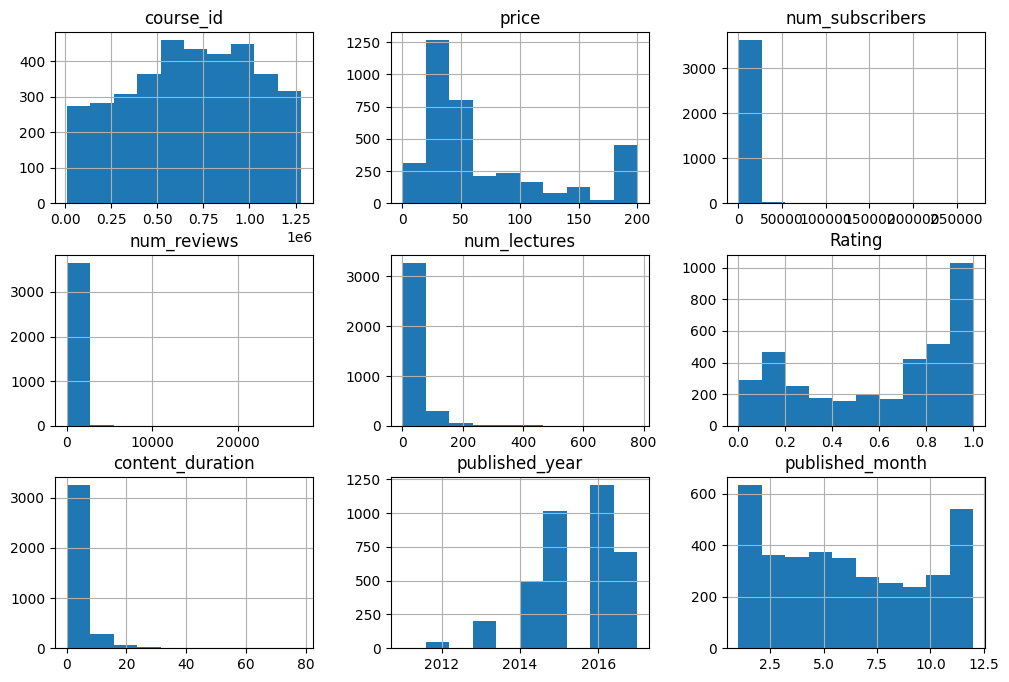

In [65]:
#checking for the skewness
df.hist(figsize=(12,8))

In [66]:
df.skew()

course_id           -0.152638
price                1.156255
num_subscribers     11.591336
num_reviews         17.813368
num_lectures         4.870835
Rating              -0.467674
content_duration     5.427303
published_year      -0.602585
published_month      0.177076
dtype: float64

**Handling skewed data**

In [67]:
print(sum(df["num_reviews"]<=0))
print(sum(df["num_lectures"]<=0))
print(sum(df["num_subscribers"]<=0))


284
1
65


In [68]:
#as there were more zero values were present therefore using logx+1 instead of logx because logx at 0 is not defined
df["num_subscribers"]=np.log(df["num_subscribers"]+1)
df["num_reviews"]=np.log(df["num_reviews"]+1)
df["num_lectures"]=np.log(df["num_lectures"]+1)


In [69]:
df.nunique()

course_id              3672
course_title           3663
url                    3672
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
Rating                  101
content_duration        105
published_timestamp    3672
subject                   4
published_year            7
published_month          12
dtype: int64

**Encoding Categorical Column level,subject as there were only 4 unique value**




In [70]:
df=df.join(pd.get_dummies(df.level)).drop(["level"],axis=1)       #converting to numerical values column level and subject
df=df.join(pd.get_dummies(df.subject)).drop(["subject"],axis=1)

In [71]:
''' By knowing the unique values and its count from features  like 'course_id','course_title','url','published_timestamp','content_duration' are not related to 'Ratings'
(dependent variable) and it adds no meaning to predict Ratings,therefore dropping'''
df.drop(['course_id','course_title','url','published_timestamp',"content_duration"],axis=1,inplace=True)

**Splitting dataset into training and testings**

In [81]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14]]
y=df["Rating"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)


In [83]:
print(x.columns)
print(y)

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'published_year', 'published_month', 'All Levels', 'Beginner Level',
       'Expert Level', 'Intermediate Level', 'Business Finance',
       'Graphic Design', 'Musical Instruments', 'Subject: Web Development'],
      dtype='object')
0       0.82
1       0.69
2       0.89
3       0.78
4       0.55
        ... 
3675    0.31
3676    0.06
3677    0.08
3678    0.78
3679    0.01
Name: Rating, Length: 3676, dtype: float64


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)

**Linear Regression**

In [91]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2_score",r2)


R-square 0.19447501200162698
mean squared error 0.08382336768580127


**Polynomial Regression**

In [103]:
#Fitting the polynomial Regression into data set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error as MSE
# Transform independent variables to polynomial features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(x_train_poly, y_train)
print("Training Accuracy",model.score(x_train_poly, y_train))
r2 = model.score(x_test_poly,y_test)
print('Testing Accuracy', r2)


Training Accuracy 0.21402128505925422
Testing Accuracy 0.2145950104543548


**Decision Tree Regressor with hyperparameter tuning**

In [108]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
train_r2 = best_model.score(X_train, y_train)
test_r2 = best_model.score(X_test, y_test)
print("Training Accuracy:", train_r2)
print("Testing Accuracy:", test_r2)
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))



Best hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Training Accuracy: 0.312916615508543
Testing Accuracy: 0.30625206345368816
The RMSE score of model is  0.27673836837942967


**Random Forest Regressor**

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error as MSE

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5,random_state=5)
#Train the model on the training data
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)
#Evaluate the model
train_r2 = rf_reg.score(X_train, y_train)
test_r2 = rf_reg.score(X_test, y_test)
print("Training Accuracy:", train_r2)
print("Testing Accuracy:", test_r2)
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))



Training Accuracy: 0.5835338417652871
Testing Accuracy: 0.3940020212336609
The RMSE score of model is  0.2586450145450881


**Random Forest Regressor with hyperparameter tuning**

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100)
# Define the hyperparameters to search
param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': [1,5,10]

}
# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)
# Use the best parameters to create a new model
rf_tuning = RandomForestRegressor(n_estimators=100, max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
# Train the model
rf_tuning.fit(X_train, y_train)
y_pred=rf_tuning.predict(X_test)
# Evaluate the model
train_r2 = rf_tuning.score(X_train, y_train)
test_r2 = rf_tuning.score(X_test, y_test)
print("Training Accuracy :", train_r2)
print("Testing Accuracy:", test_r2)
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))


Best parameters: {'max_depth': 15, 'min_samples_leaf': 5}
Training Accuracy : 0.670906747458101
Testing Accuracy: 0.41418659362784005
The RMSE score of model is  0.25430106384996914


**Gradient Boosting Regressor**

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

# Train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Training Accuracy:",model.score(X_train,y_train))
# Testing Test
print('Testing Accuracy:', model.score(X_test,y_test))
#rmse
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))


Training Accuracy: 0.4159674328418683
Testing Accuracy: 0.3580202336068661
The RMSE score of model is  0.26621295983213045


**Gradient Boosting Regressor with hyperparameter tuning**

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE
model=GradientBoostingRegressor(n_estimators=100)
# Define the hyperparameters to search
param_grid = {
    'max_depth': [5,10,15,20,25]
}
# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)
# Use the best parameters to create a new model
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=best_params['max_depth'],random_state=1)
# Train the model
GBR.fit(X_train, y_train)
y_pred=GBR.predict(X_test)
# Evaluate the model
train_r2 = GBR.score(X_train, y_train)
test_r2 = GBR.score(X_test, y_test)
print("Training Accuracy :", train_r2)
print("Testing Accuracy:", test_r2)
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))

Best parameters: {'max_depth': 5}
Training Accuracy : 0.6371247101488875
Testing Accuracy: 0.36196246923913067
The RMSE score of model is  0.26539432786275424


**XGBoost Regressor**

In [131]:
from xgboost import XGBRegressor
from sklearn import metrics
RegModel=XGBRegressor(learning_rate=0.1, n_estimators=100, objective='reg:squarederror', booster='gbtree')
XGB=RegModel.fit(X_train,y_train)
y_pred=XGB.predict(X_test)
print('Training accuracy:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('Testing accuracy:',metrics.r2_score(y_test,y_pred))
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))


Training accuracy: 0.7229371950836738
Testing accuracy: 0.3740497017885617
The RMSE score of model is  0.26286844083681354


**XGBoost Regressor with hyperparameter tuning**

In [136]:
from xgboost import XGBRegressor
from sklearn import metrics
model=XGBRegressor(learning_rate=0.1, n_estimators=500, objective='reg:squarederror', booster='gbtree')
params = {
    'max_depth':[3,5,7,9,10,12]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)
RegModel=XGBRegressor(n_estimators=100,learning_rate=0.1, objective='reg:squarederror', booster='gbtree',max_depth=best_params["max_depth"])
XGB=RegModel.fit(X_train,y_train)
y_pred=XGB.predict(X_test)
print('Training accuracy:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('Testing accuracy:',metrics.r2_score(y_test,y_pred))
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))




Best parameters: {'max_depth': 10}
Training accuracy: 0.9769441404617514
Testing accuracy: 0.3392525332602462
The RMSE score of model is  0.27007617687756913


# **`Conclusion`**

* As no features are highly correlated with the target variable Rating,no model fits the data.

* So it is important to add more relative features and increase the dataset size inorder to predict the ratings accurately.

* After applying various regression model, Random Forest model gives comparatively somewhat better accuracy i.e 58%,so considering it.


